<a href="https://colab.research.google.com/github/HarshaLLabade/My_Projects/blob/main/Chess_Game_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/HarshaLLabade/ICT/main/Data%20sets/games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [ ]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

## Checking null values

In [ ]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [ ]:
## No missing values.

## Box plots of integers type variables

In [ ]:
lst=[]
for i in range(len(df.columns)):
  x=df.columns[i]
  if df[x].dtype=='int64':
    lst.append(x)

lst

['turns', 'white_rating', 'black_rating', 'opening_ply']

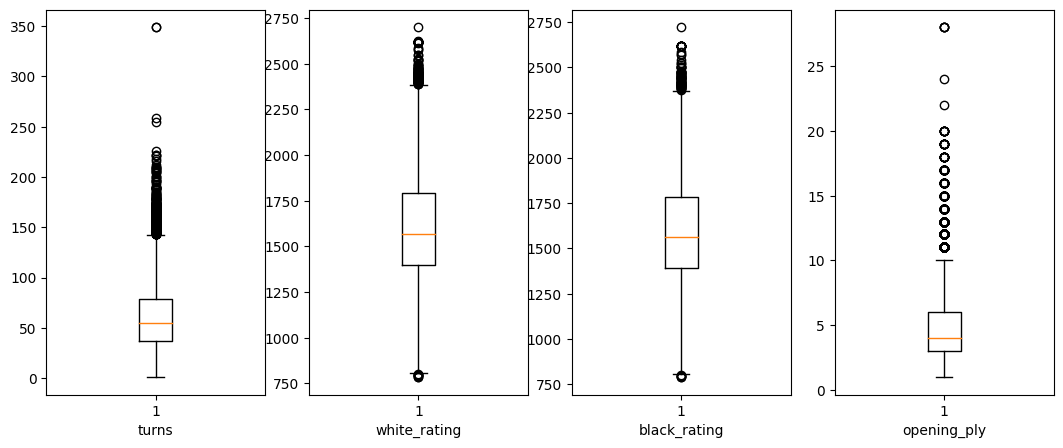

In [ ]:
plt.figure(figsize=[13,5])
for i in range(0,len(lst)):
  x=lst[i]
  plt.subplot(1,4,i+1)
  plt.xlabel(x)
  plt.boxplot(df[x])

In [ ]:
## Too many outliers

## Removing Outliers

In [ ]:
for x in lst:
  Q1=df[x].quantile(0.25)
  Q3=df[x].quantile(0.75)
  IQR=Q3 - Q1
  lower = Q1 -(1.5)*IQR
  upper = Q3 +(1.5)*IQR
  mask= (df[x]>upper) | (df[x]<lower)

  for i,data in df.iterrows():
    if data[x]<lower:
      df.at[i,x]=lower
    elif data[x]>upper:
      df.at[i,x]=upper



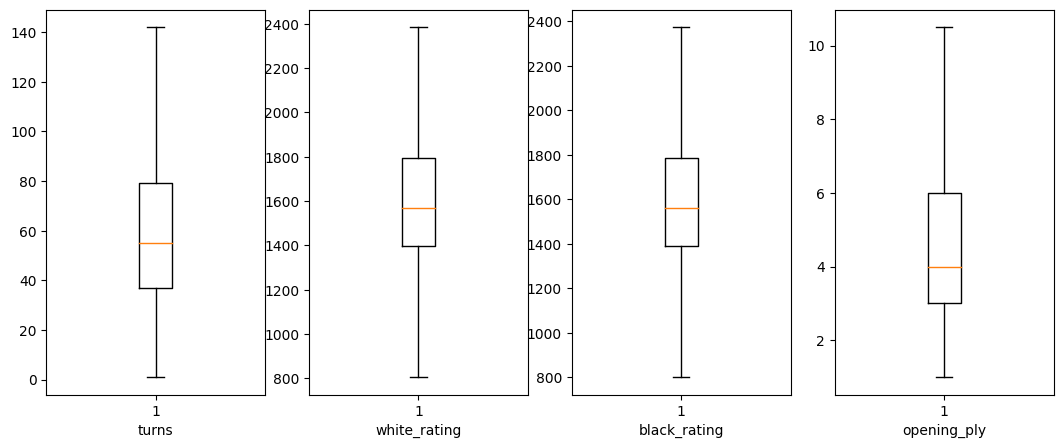

In [ ]:
plt.figure(figsize=[13,5])
for i in range(0,len(lst)):
  x=lst[i]
  plt.subplot(1,4,i+1)
  plt.xlabel(x)
  plt.boxplot(df[x])

## First change in dataset removeing the "moves" column

In [ ]:
# moves and number of turns are appeard to be same, so remove the "moves" column.
df_update_1=df.copy()
df_update_1.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [ ]:
df_update_1 =df_update_1.drop(["moves"],axis=1)
df_update_1.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

## Checking the duplicate entries

In [ ]:
lst_1=[]
for i in range(len(df_update_1.columns)):
  x=df_update_1.columns[i]
  if df_update_1[x].dtype=='object':
    lst_1.append(x)

lst_1

['id',
 'victory_status',
 'winner',
 'increment_code',
 'white_id',
 'black_id',
 'opening_eco',
 'opening_name']

In [ ]:
df_update_1['id'].value_counts()

XRuQPSzH    5
edYOVb5F    4
o4T7dj5h    4
I8odmGjb    4
ZPHBiKBY    4
           ..
BhFsUnIo    1
1fDJ7N8j    1
ND68cHO6    1
clnqpkWZ    1
N8G2JHGG    1
Name: id, Length: 19113, dtype: int64

In [ ]:
mask=(df_update_1['id']=='XRuQPSzH')
df_update_1[mask]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
120,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036.0,cdvh,1706.0,A08,King's Indian Attack: French Variation,6.0
950,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036.0,cdvh,1706.0,A08,King's Indian Attack: French Variation,6.0
12412,XRuQPSzH,True,1.503584e+12,1.503584e+12,50,resign,black,10+0,chess-brahs,2036.0,cdvh,1706.0,A08,King's Indian Attack: French Variation,6.0
13729,XRuQPSzH,True,1.503584e+12,1.503584e+12,50,resign,black,10+0,chess-brahs,2036.0,cdvh,1706.0,A08,King's Indian Attack: French Variation,6.0
14403,XRuQPSzH,True,1.503584e+12,1.503584e+12,50,resign,black,10+0,chess-brahs,2036.0,cdvh,1706.0,A08,King's Indian Attack: French Variation,6.0


In [ ]:
mask=(df_update_1['id']=='I8odmGjb')
df_update_1[mask]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
205,I8odmGjb,False,1.503740e+12,1.503740e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0
11432,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0
13759,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0
19080,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0


In [ ]:
d=df_update_1.copy()


In [ ]:
d=d.drop_duplicates(subset=['id'])
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  float64
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  float64
 12  opening_eco     19113 non-null  object 
 13  opening_name    19113 non-null  object 
 14  opening_ply     19113 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(8)
memory usage: 2.2+ MB


In [ ]:
mask=(d['id']=='I8odmGjb')
d[mask]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
205,I8odmGjb,False,1.503740e+12,1.503740e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0


In [ ]:
mask=(df_update_1['id']=='I8odmGjb')
df_update_1[mask]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
205,I8odmGjb,False,1.503740e+12,1.503740e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0
11432,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0
13759,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0
19080,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,Scotch Game,7.0


In [ ]:
(d['id'].value_counts(),"\n",d['id'].describe())

(TZJHLljE    1
 ojkMBE49    1
 JTfFY9HD    1
 0wkPVyCT    1
 9oQQUmDI    1
            ..
 VQYAN5Gg    1
 jsSuL4AK    1
 akJMiDuY    1
 xtdvNSoe    1
 N8G2JHGG    1
 Name: id, Length: 19113, dtype: int64,
 '\n',
 count        19113
 unique       19113
 top       TZJHLljE
 freq             1
 Name: id, dtype: object)

In [ ]:
## Here from above observation we infer that there are some repeated entries in data,
##   so we have to remove them. To do the same we use the following command.
##          .drop_duplicates(subset=['id'])
## Hence we get all distinct entries.

In [ ]:
lst_1

['id',
 'victory_status',
 'winner',
 'increment_code',
 'white_id',
 'black_id',
 'opening_eco',
 'opening_name']

In [ ]:
df_update_1['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [ ]:
df_update_1['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [ ]:
df_update_1.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500.0,a-00,1191.0,D10,Slav Defense: Exchange Variation,5.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322.0,skinnerua,1261.0,B00,Nimzowitsch Defense: Kennedy Variation,4.0


In [ ]:
print(df_update_1["created_at"].describe(),"\n","\n",df_update_1["last_move_at"].describe())

count    2.005800e+04
mean     1.483617e+12
std      2.850151e+10
min      1.376772e+12
25%      1.477548e+12
50%      1.496010e+12
75%      1.503170e+12
max      1.504493e+12
Name: created_at, dtype: float64 
 
 count    2.005800e+04
mean     1.483618e+12
std      2.850140e+10
min      1.376772e+12
25%      1.477548e+12
50%      1.496010e+12
75%      1.503170e+12
max      1.504494e+12
Name: last_move_at, dtype: float64


In [ ]:
print(df_update_1["created_at"].value_counts(),"\n","\n",df_update_1["last_move_at"].value_counts())

1.504210e+12    45
1.504140e+12    39
1.504200e+12    38
1.503860e+12    37
1.504050e+12    32
                ..
1.502509e+12     1
1.502508e+12     1
1.502506e+12     1
1.502505e+12     1
1.499643e+12     1
Name: created_at, Length: 13151, dtype: int64 
 
 1.504210e+12    46
1.504140e+12    39
1.504200e+12    35
1.503860e+12    34
1.503870e+12    33
                ..
1.502505e+12     1
1.502504e+12     1
1.502503e+12     1
1.502442e+12     1
1.499644e+12     1
Name: last_move_at, Length: 13186, dtype: int64


In [ ]:
## I think "created_at" and "last_move_at" are just the time taken by players to play the game, so we can remove it.
## It doesn't effect the analysis because we have the time control feature of the game in "increment_code".
## As well as the "turns" feature which explain about the total turns played in the game.

## Second change in the dataset

In [ ]:
## Droping the columns "created_at" and "last_move_at".
## Removing the duplicates entries in dataset.

In [ ]:
df_update_2=df_update_1.copy()

In [ ]:
df_update_2=df_update_1.drop(["created_at","last_move_at"],axis=1)

In [ ]:
df_update_1.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [ ]:
df_update_2.columns

Index(['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'opening_eco',
       'opening_name', 'opening_ply'],
      dtype='object')

In [ ]:
df_update_2=df_update_2.drop_duplicates(subset=['id'])

In [ ]:
(df_update_1.info(),df_update_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  float64
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  float64
 12  opening_eco     20058 non-null  object 
 13  opening_name    20058 non-null  object 
 14  opening_ply     20058 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(8)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113

(None, None)

In [ ]:
df_update_2.iloc[[13,17]]

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
13,2fEjSei6,False,31,resign,black,8+0,daniel_likes_chess,1381.0,alkhan,1607.0,C00,French Defense #2,2.0
17,EwaK0IsE,False,66,mate,black,15+16,sureka_akshat,1141.0,shivangithegenius,1094.0,C50,Four Knights Game: Italian Variation,8.0


## One Hot Encoding

In [ ]:
Encoded_df=df_update_2.copy()

In [ ]:
Encoded_df=pd.get_dummies(Encoded_df,columns=["rated","victory_status","increment_code","opening_eco"])

In [ ]:
Encoded_df.head(2)

,id,turns,winner,white_id,white_rating,black_id,black_rating,opening_name,opening_ply,rated_False,...,opening_eco_E81,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98
0,TZJHLljE,13,white,bourgris,1500.0,a-00,1191.0,Slav Defense: Exchange Variation,5.0,1,...,0,0,0,0,0,0,0,0,0,0
1,l1NXvwaE,16,black,a-00,1322.0,skinnerua,1261.0,Nimzowitsch Defense: Kennedy Variation,4.0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-73-c7ab05ab227d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=df_update_2.corr()


<Axes: >

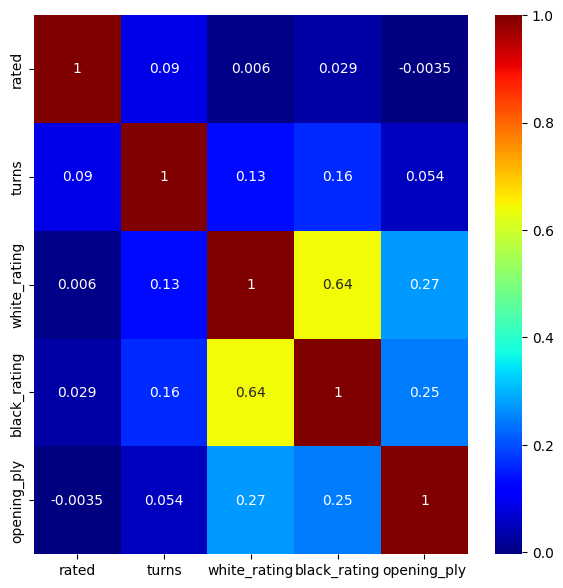

In [ ]:
plt.figure(figsize=[7,7])
x=df_update_2.corr()
sns.heatmap(x,annot=True,cmap="jet")

## Rember that columns "id", "white_id","black_id"
## and "opening_name" are doesn't contribute any information in training the dataset.

In [ ]:
to_drop=["id","white_id","black_id","opening_name"]

In [ ]:
Encoded_df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
x = Encoded_df.drop("winner", axis = 1)
y = Encoded_df["winner"]

In [ ]:
x

,turns,white_rating,black_rating,opening_ply,rated_False,rated_True,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,...,opening_eco_E81,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98
0,13,1500.0,1191.0,5.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1322.0,1261.0,4.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,61,1496.0,1500.0,3.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,1439.0,1454.0,3.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,1523.0,1469.0,5.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,24,1691.0,1220.0,2.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20054,82,1233.0,1196.0,2.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20055,35,1219.0,1286.0,3.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20056,109,1360.0,1227.0,4.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
model=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1530    0 1085]
 [   8  270    6]
 [1062    4 1769]]
              precision    recall  f1-score   support

       black       0.59      0.59      0.59      2615
        draw       0.99      0.95      0.97       284
       white       0.62      0.62      0.62      2835

    accuracy                           0.62      5734
   macro avg       0.73      0.72      0.73      5734
weighted avg       0.62      0.62      0.62      5734

